![Header.jpeg](../assets/banner_linreg.png)

# Analisis dan Prediksi Konsumsi Energi pada Bangunan Menggunakan Algoritma *Ridge*, *Lasso* dan *Elastic Net Regression*

---

<h2>Daftar isi</h2>

- <a href=#bu>Business Understanding</a>
- <a href=#du>Data Understanding</a>
- <a href=#dp>Data Preparation</a>
- <a href=#ml>Modeling</a>
- <a href=#ev>Evaluation</a>
- <a href=#dy>Deployment</a>


<hr>


<h2 id='bu'>Business Understanding</h2>

Dataset "Energy Consumption" berguna untuk mengetahui pola penggunaan energi yang dibutuhkan oleh suatu bangunan berdasarkan karakteristiknya, sehingga dataset ini mampu  membantu prediksi kebutuhan energi dari berbagai jenis bangunan dan bermacam-macam faktor lingkungan lainnya. Hal ini dapat berguna dalam memperkirakan rata-rata biaya yang dibutuhkan dan juga memungkinkan pemilik dalam mengoptimisasi penggunaan energi yang lebih efisien.

Dataset ini terdiri dari 7 macam fitur yang terbagi menjadi dua jenis data yaitu data latih dan data uji, yang masing-masing berjumlah 1000 baris data uji dan 100 baris data latih. Kolom-kolom pada dataset ini terdiri dari:

1. **Building Type** : Fitur untuk menjelaskan kategori bangunan
2. **Square Footage** : Fitur yang merepresentasikan luas bangunan dalam satuan meter persegi
3. **Number of Occupation** : Fitur yang memberikan informasi mengenai banyak penghuni dengan tipe data  
4. **Appliances Used** : Fitur yang memberikan informasi mengenai jumlah peralatan yang ada
5. **Average Temparature** : Fitur mengenai rata-rata suhu dalam satuan derajat celcius
6. **Day of Week** : Fitur ini menunjukkan data point diambil selama hari kerja (weekday) atau akhir pekan (weekend)
7. **Energy Consumption** : Fitur target mengenai banyaknya energi yang dikonsumsi dalam satuan kWh (Kilowatt-hours)

<hr>

<h2 id='du'>Data Understanding</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../datasets/train_energy_data.csv")
df_train.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98
999,Commercial,15813,57,11,31.40,Weekend,3423.63


In [3]:
df_test = pd.read_csv("../datasets/test_energy_data.csv")
df_test.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39
99,Residential,42414,72,24,29.62,Weekday,4722.59


Karena kedua dataset memiliki fitur dan karakteristik isi yang serupa, maka akan dilakukan proses concatenation untuk memperoleh gambaran keseluruhan karakteristik data

In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
1095,Commercial,1161,81,11,15.45,Weekend,3010.81
1096,Residential,37943,50,23,21.73,Weekend,4248.49
1097,Commercial,1558,27,29,16.86,Weekend,2843.60
1098,Industrial,2145,56,12,11.77,Weekend,3348.39
1099,Residential,42414,72,24,29.62,Weekday,4722.59


### Checking Data Dist

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [6]:
df.describe(include="all")

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100,1100.000000
unique,3,NaN,NaN,NaN,NaN,2,NaN
top,Residential,NaN,NaN,NaN,NaN,Weekday,NaN
freq,387,NaN,NaN,NaN,NaN,551,NaN
mean,NaN,25500.527273,48.268182,25.730000,22.559745,NaN,4168.191273
std,NaN,14236.955632,29.127624,14.116209,7.122357,NaN,924.278723
min,NaN,560.000000,1.000000,1.000000,10.050000,NaN,1683.950000
25%,NaN,13203.750000,22.000000,13.000000,16.365000,NaN,3510.460000
50%,NaN,25785.500000,47.000000,26.000000,22.810000,NaN,4189.690000
75%,NaN,37536.750000,73.000000,38.000000,28.760000,NaN,4859.510000


### Checking Data Validity

#### NULL

In [7]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

#### Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### Outliers

In [9]:
df_check_ol = df.select_dtypes(exclude=["object"])

q1 = df_check_ol.quantile(.25)
q3 = df_check_ol.quantile(.75)
iqr = q3 - q1
low_bound = q1 - (1.5 * iqr)
up_bound = q3 + (1.5 * iqr)

ol = ((df_check_ol < low_bound) | (df_check_ol > up_bound))
ol.sum()

Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Energy Consumption     0
dtype: int64

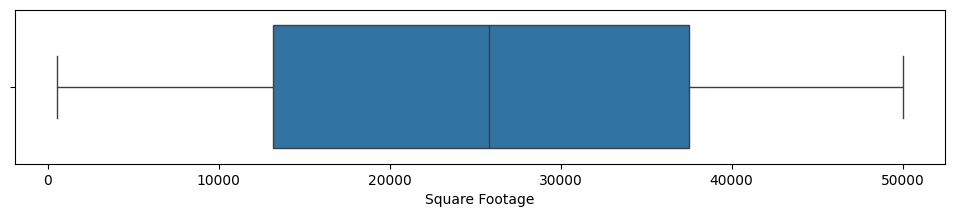

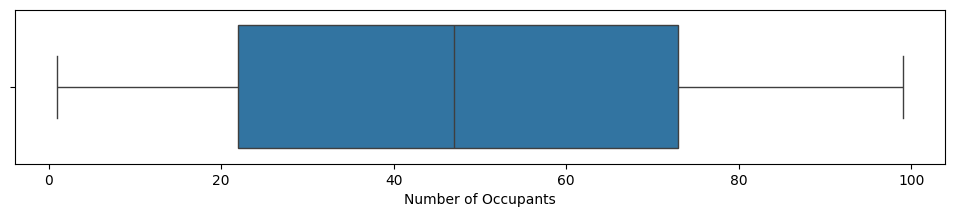

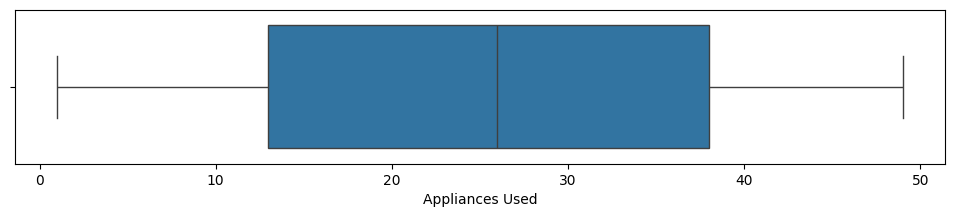

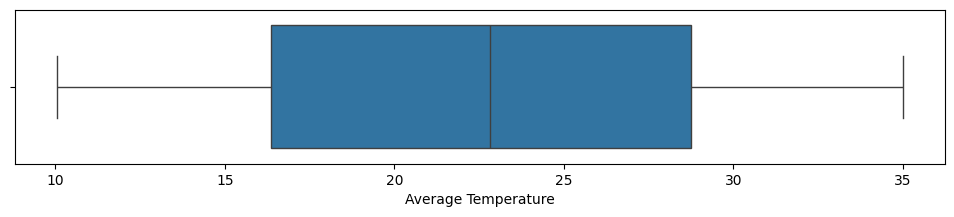

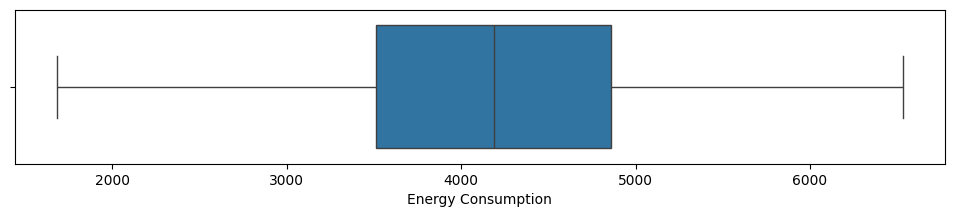

In [10]:
for x in df_check_ol:
    plt.figure(figsize=(12, 2))
    sns.boxplot(data=df_check_ol, x=x)

plt.show()

### Dist of All Object Features

In [11]:
def dist_obj_cols(feature: str):
    ax = sns.histplot(x=df[feature])
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + (p.get_width() / 2), p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
        
    plt.title(feature)        
    plt.show()

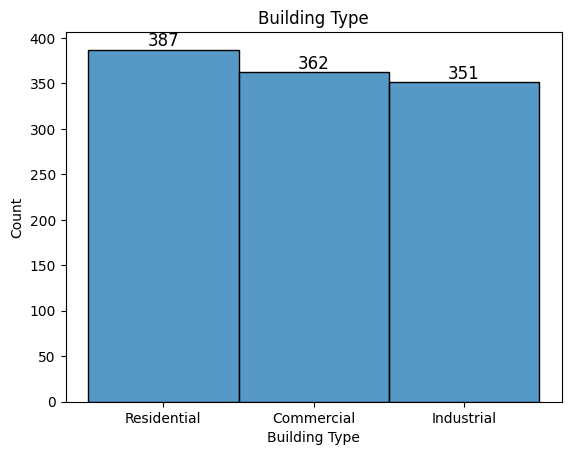

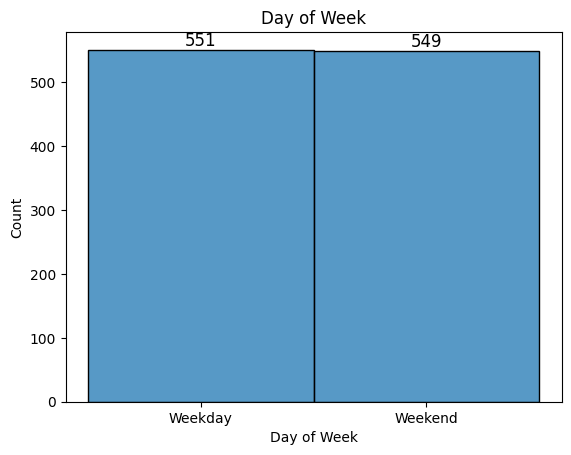

In [12]:
for x in df.columns:
    if df[x].dtype == "object":
        dist_obj_cols(x)

### Dist of All Numeric Features

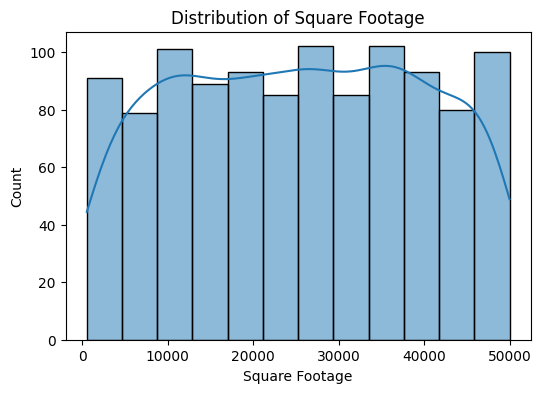

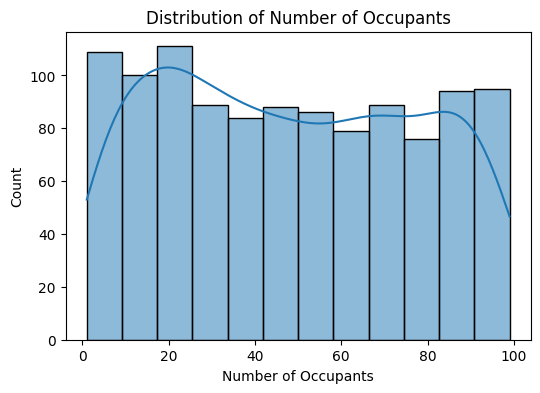

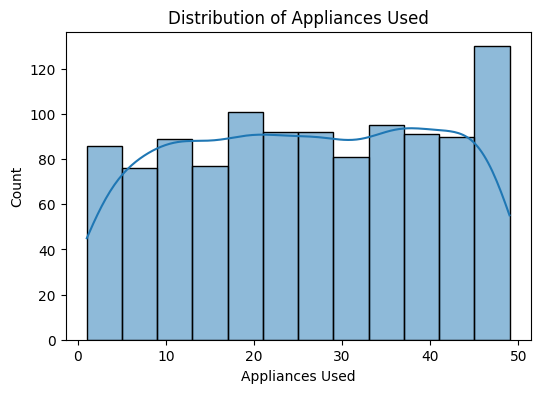

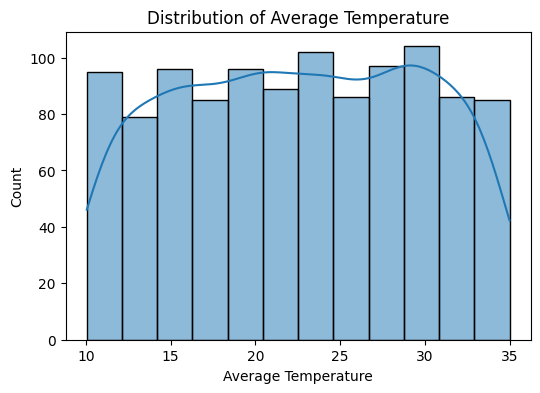

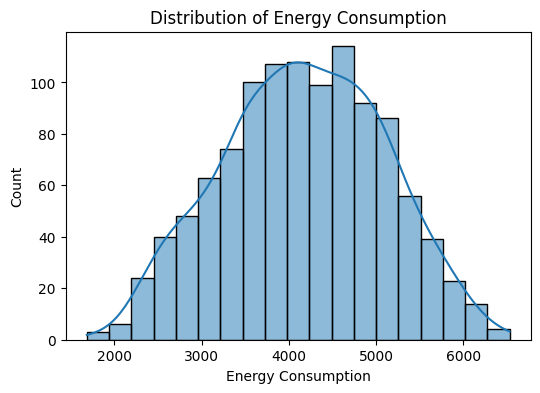

In [13]:
for x in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()

### Checking Corr

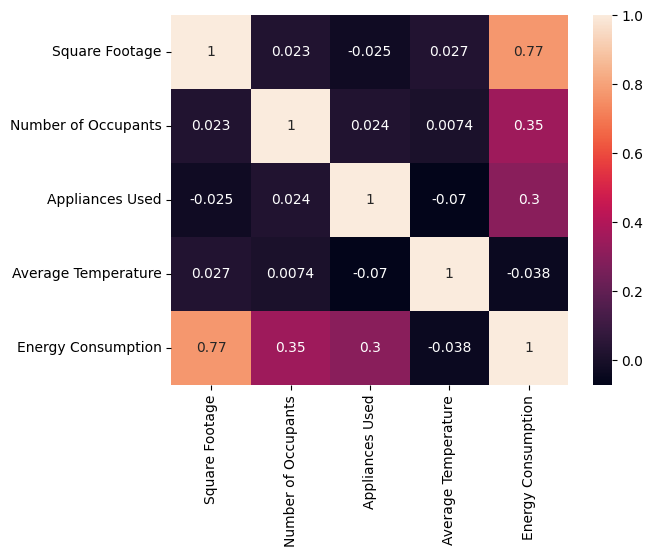

In [14]:
sns.heatmap(
    data=df.select_dtypes(exclude=["object"]).corr(),
    annot=True
);

<hr>

<h2 id='du'>Data Preparation</h2>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


### One-Hot Encoding

In [16]:
df.select_dtypes(include=["object"]).columns

Index(['Building Type', 'Day of Week'], dtype='object')

In [17]:
df_encoded = pd.get_dummies(
    data=df,
    columns=df.select_dtypes(include=["object"]).columns
)

df_encoded.tail()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
1095,1161,81,11,15.45,3010.81,True,False,False,False,True
1096,37943,50,23,21.73,4248.49,False,False,True,False,True
1097,1558,27,29,16.86,2843.60,True,False,False,False,True
1098,2145,56,12,11.77,3348.39,False,True,False,False,True
1099,42414,72,24,29.62,4722.59,False,False,True,True,False


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   int64  
 1   Number of Occupants        1100 non-null   int64  
 2   Appliances Used            1100 non-null   int64  
 3   Average Temperature        1100 non-null   float64
 4   Energy Consumption         1100 non-null   float64
 5   Building Type_Commercial   1100 non-null   bool   
 6   Building Type_Industrial   1100 non-null   bool   
 7   Building Type_Residential  1100 non-null   bool   
 8   Day of Week_Weekday        1100 non-null   bool   
 9   Day of Week_Weekend        1100 non-null   bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 48.5 KB


### Cast all dtypes to float64

In [19]:
new_df = df_encoded.astype("float64")
new_df.tail(1)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
1099,42414.0,72.0,24.0,29.62,4722.59,0.0,0.0,1.0,1.0,0.0


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   float64
 1   Number of Occupants        1100 non-null   float64
 2   Appliances Used            1100 non-null   float64
 3   Average Temperature        1100 non-null   float64
 4   Energy Consumption         1100 non-null   float64
 5   Building Type_Commercial   1100 non-null   float64
 6   Building Type_Industrial   1100 non-null   float64
 7   Building Type_Residential  1100 non-null   float64
 8   Day of Week_Weekday        1100 non-null   float64
 9   Day of Week_Weekend        1100 non-null   float64
dtypes: float64(10)
memory usage: 86.1 KB


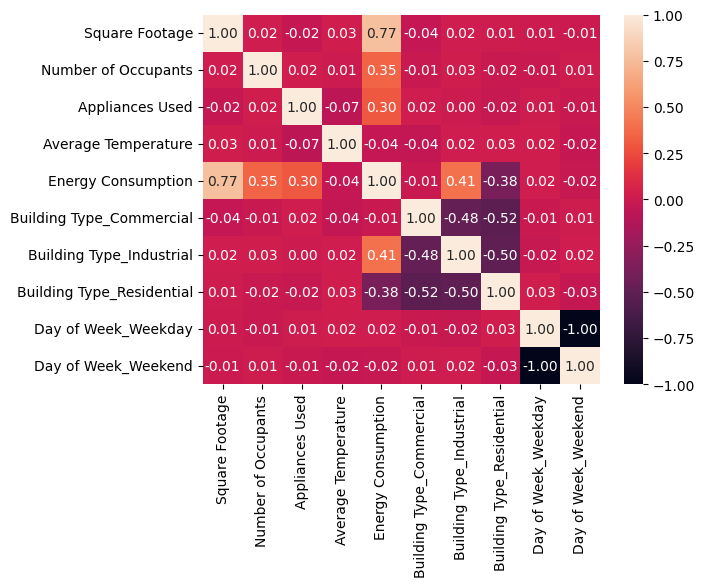

In [21]:
sns.heatmap(new_df.corr(), annot=True, fmt=".2f");

<hr>

<h2 id='ml'>Modeling</h2>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

### Data Splitting

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   float64
 1   Number of Occupants        1100 non-null   float64
 2   Appliances Used            1100 non-null   float64
 3   Average Temperature        1100 non-null   float64
 4   Energy Consumption         1100 non-null   float64
 5   Building Type_Commercial   1100 non-null   float64
 6   Building Type_Industrial   1100 non-null   float64
 7   Building Type_Residential  1100 non-null   float64
 8   Day of Week_Weekday        1100 non-null   float64
 9   Day of Week_Weekend        1100 non-null   float64
dtypes: float64(10)
memory usage: 86.1 KB


In [24]:
X = new_df.drop(columns="Energy Consumption")
y = new_df["Energy Consumption"]

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   float64
 1   Number of Occupants        1100 non-null   float64
 2   Appliances Used            1100 non-null   float64
 3   Average Temperature        1100 non-null   float64
 4   Building Type_Commercial   1100 non-null   float64
 5   Building Type_Industrial   1100 non-null   float64
 6   Building Type_Residential  1100 non-null   float64
 7   Day of Week_Weekday        1100 non-null   float64
 8   Day of Week_Weekend        1100 non-null   float64
dtypes: float64(9)
memory usage: 77.5 KB


In [26]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: Energy Consumption
Non-Null Count  Dtype  
--------------  -----  
1100 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [28]:
X_train.shape, X_test.shape

((880, 9), (220, 9))

### Feature Scaling

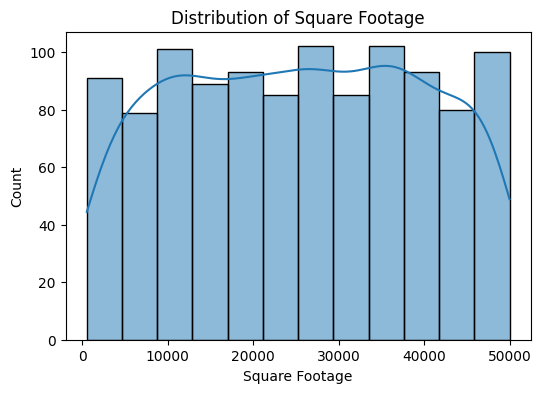

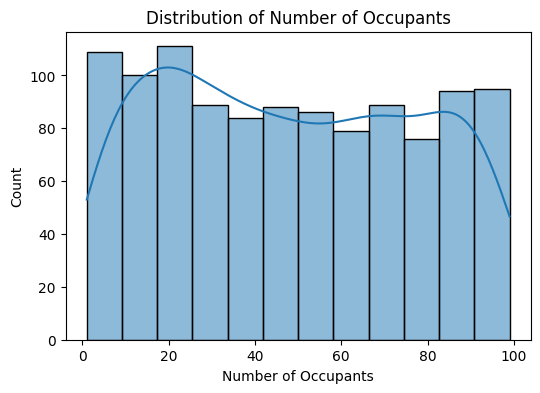

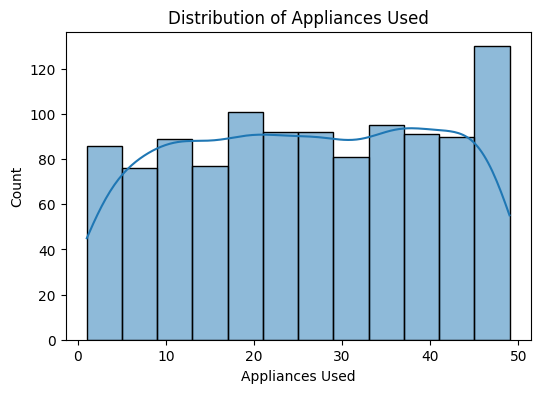

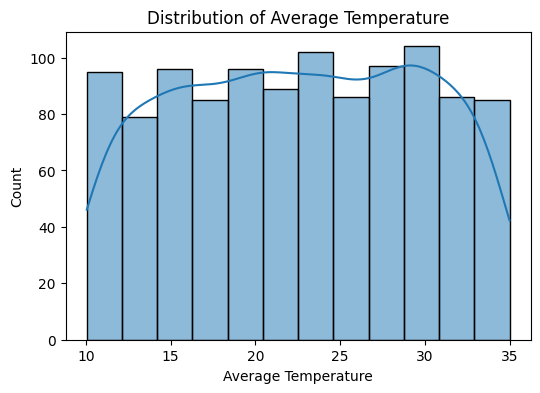

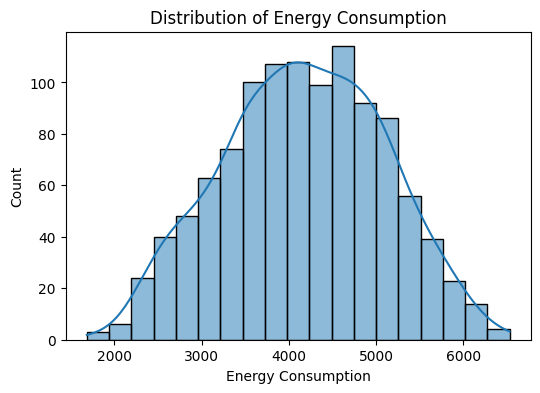

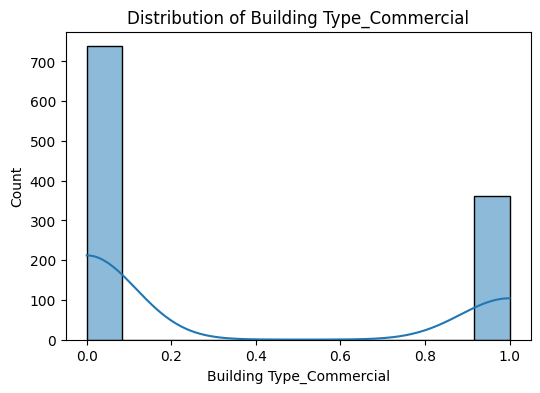

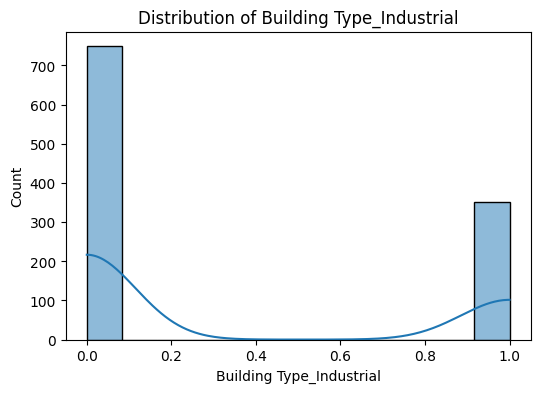

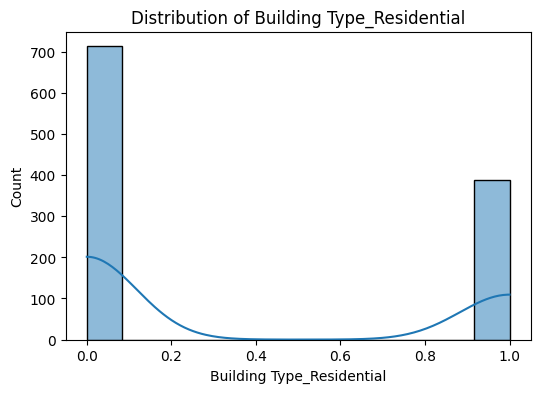

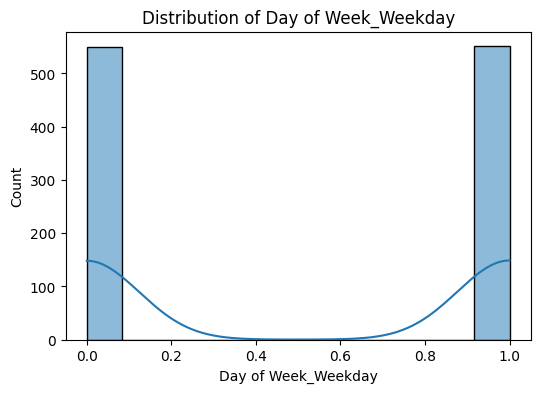

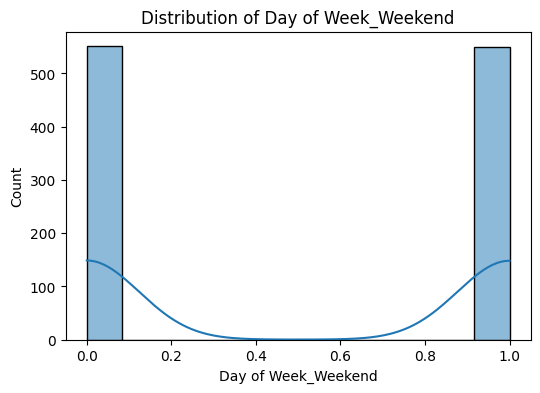

In [29]:
for x in new_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(new_df[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()

In [30]:
# scaler = MinMaxScaler() # Each feature appears to be randomly distributed, Imma use minmaxscaler, cmiiw
# X_train_scaled = scaler.fit_transform(X_train)

# # Dump Scaler
# joblib.dump(scaler, "../models/scaler_minmax_fnb1.joblib")

# X_test_scaled = scaler.transform(X_test)

In [31]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)

# Dump Scaler
joblib.dump(scaler, "../models/scaler_standardscaler_fnb1.joblib")

X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled[:5]

array([[ 0.38484912,  0.77245245, -0.39631697, -1.50608425,  1.39750497,
        -0.67241744, -0.73379939,  1.00455583, -1.00455583],
       [ 0.98803848,  0.94451698, -0.11242691, -1.7470157 , -0.71556096,
        -0.67241744,  1.36277029,  1.00455583, -1.00455583],
       [-0.1792721 ,  0.35949756,  1.51994091,  1.39209705, -0.71556096,
        -0.67241744,  1.36277029, -0.99546483,  0.99546483],
       [-0.83467005, -1.15467035,  1.09410582,  1.4257154 , -0.71556096,
        -0.67241744,  1.36277029,  1.00455583, -1.00455583],
       [ 1.41220677, -0.36317349, -0.60923451, -0.31403384, -0.71556096,
        -0.67241744,  1.36277029, -0.99546483,  0.99546483]])

In [33]:
X_test_scaled[:5]

array([[-0.50481632,  0.77245245,  1.30702336,  0.68891338, -0.71556096,
        -0.67241744,  1.36277029,  1.00455583, -1.00455583],
       [-1.26703346,  0.66921372,  0.81021577, -0.19777041, -0.71556096,
         1.48717142, -0.73379939,  1.00455583, -1.00455583],
       [-0.87585761,  0.49714919,  0.4553532 ,  1.66664685, -0.71556096,
         1.48717142, -0.73379939,  1.00455583, -1.00455583],
       [-0.05104668, -1.4299736 ,  0.24243566, -0.17956047,  1.39750497,
        -0.67241744, -0.73379939, -0.99546483,  0.99546483],
       [ 0.41989034,  1.70160094, -0.18339943, -0.29722467, -0.71556096,
        -0.67241744,  1.36277029, -0.99546483,  0.99546483]])

### Training

#### LinearRegression Model

In [34]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred_linreg = linreg_model.predict(X_test_scaled)

#### ElasticNet Model

In [36]:
elasticnet_model = ElasticNet()

elasticnet_model.fit(X_train_scaled, y_train)

ElasticNet()

In [37]:
y_pred_elastic = elasticnet_model.predict(X_test_scaled)

<hr>

<h2 id='ml'>Evaluation</h2>

In [38]:
mse_linreg =  mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

mse_elastic =  mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

metrics = ["mse_linreg", "r2_linreg", "mse_elastic", "r2_elastic"]
values = [mse_linreg, r2_linreg, mse_elastic, r2_elastic]

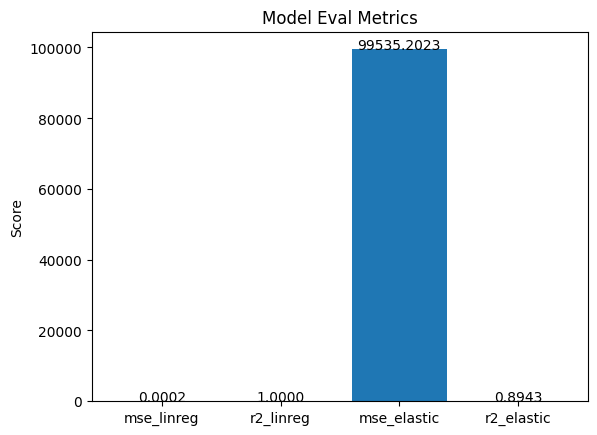

In [39]:
plt.bar(metrics, values)
plt.title("Model Eval Metrics")
plt.ylabel("Score")

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')

plt.show()

In [40]:
res = pd.DataFrame({"Actual": y_test, "Pred_Linreg": y_pred_linreg, "Pred_Elastic": y_pred_elastic})
res.sample(10)

,Actual,Pred_Linreg,Pred_Elastic
846,4905.84,4905.850392,4682.624859
190,4841.23,4841.250715,4646.654445
1069,3844.00,3843.999324,3897.137936
119,5094.10,5094.100610,4731.918881
180,3171.27,3171.250633,3499.965054
862,4235.19,4235.200463,4172.158204
367,4271.39,4271.400815,4281.519409
404,4584.62,4584.599327,4388.737406
91,3501.94,3501.950676,3708.433840
803,5063.09,5063.100291,4749.579436


<hr>

<h2 id='ml'>Deployment</h2>

In [41]:
joblib.dump(linreg_model, "../models/model_linreg_fnb1.joblib")
joblib.dump(elasticnet_model, "../models/model_elastic_fnb1.joblib")

['../models/model_elastic_fnb1.joblib']



---


Copyright © 2025 by DGX Development Team, Gunadarma University


https://www.hpc-hub.gunadarma.ac.id/